In [ ]:
pip install psycopg2

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
import psycopg2
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [ ]:
conn= psycopg2.connect(database="delati", user="modulo4", password="modulo4", host="128.199.1.222", port="5432")
cursor=conn.cursor()
sql="select distinct o.htitulo_cat, o.htitulo from webscraping w inner join oferta o on (w.id_webscraping=o.id_webscraping) where o.id_estado is null order by 1,2 limit 500;"


In [ ]:
def load_data():
    cursor.execute(sql)
    result=cursor.fetchall()
    return result

In [ ]:
def init():
    data = load_data()
    json_result = json.dumps(data)
    return json_result

In [ ]:
data1 = load_data()
#print(data1)
df = pd.read_sql(sql, con = conn)
print(df)
df.shape
#DBSCAN_data_scaler = StandardScaler().fit(data)
#data = DBSCAN_data_scaler.transform(data)

dups = df.groupby(['htitulo_cat']).count()
print(dups)
dups.shape

               htitulo_cat                   htitulo
0                ARCHITECT        ARQUITECTO ANDROID
1                ARCHITECT        ARQUITECTO BACKEND
2                ARCHITECT    ARQUITECTO DE SOFTWARE
3                ARCHITECT           CLOUD ARCHITECT
4                ARCHITECT   ENTERPRISE ARCHITECTURE
..                     ...                       ...
128        SYSTEM ANALYSIS           ESPECIALISTA TI
129  TRAINING AND RESEARCH  ANALISTA DE CAPACITACION
130  TRAINING AND RESEARCH     COORDINADOR ACADEMICO
131  TRAINING AND RESEARCH           RESEARCH EXPERT
132  TRAINING AND RESEARCH      SEARCH ENGINE EXPERT

[133 rows x 2 columns]
                                        htitulo
htitulo_cat                                    
ARCHITECT                                     6
ARTIFICIAL INTELLIGENCE                       1
BUSINESS INTELLIGENCE                         2
CLOUD COMPUTING                               2
COMMUNICATION & NETWORKING                    3
COMP

(19, 1)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
transformed_data = df.apply(label_encoder.fit_transform)
print(transformed_data)
X=transformed_data.iloc[:,[0,1]].values
print(X)

     htitulo_cat  htitulo
0              0       31
1              0       32
2              0       33
3              0       50
4              0       73
..           ...      ...
128           17       83
129           18       10
130           18       59
131           18      116
132           18      121

[133 rows x 2 columns]
[[  0  31]
 [  0  32]
 [  0  33]
 [  0  50]
 [  0  73]
 [  0 103]
 [  1  80]
 [  2   4]
 [  2  74]
 [  3   7]
 [  3  53]
 [  4   2]
 [  4  25]
 [  4  82]
 [  5  58]
 [  5 109]
 [  5 124]
 [  5 128]
 [  6  13]
 [  6  16]
 [  6  26]
 [  6  34]
 [  6  75]
 [  6 122]
 [  7   1]
 [  7   3]
 [  7   5]
 [  7   9]
 [  7  45]
 [  7  51]
 [  7  60]
 [  7  62]
 [  7  63]
 [  7  65]
 [  7  66]
 [  7 127]
 [  8   0]
 [  8  20]
 [  8  21]
 [  8  22]
 [  8  23]
 [  8  29]
 [  8  30]
 [  8  35]
 [  8  36]
 [  8  37]
 [  8  38]
 [  8  39]
 [  8  40]
 [  8  41]
 [  8  42]
 [  8  44]
 [  8  46]
 [  8  47]
 [  8  48]
 [  8  49]
 [  8  52]
 [  8  54]
 [  8  56]
 [  8  64]
 [  

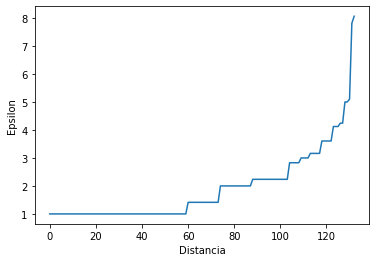

In [ ]:
# Usamos vecinos más cercanos para calcular la distancia entre puntos.
# calcular distancias 
neigh=NearestNeighbors(n_neighbors=2)
distance=neigh.fit(X)

# índices y valores de distancia
distances,indices=distance.kneighbors(X)

# Ahora ordenando el orden creciente de distancia
sorting_distances=np.sort(distances,axis=0)

# distancias ordenadas
sorted_distances=sorting_distances[:,1]
# grafico entre distancia vs épsilon
plt.plot(sorted_distances)
plt.xlabel('Distancia')
plt.ylabel('Epsilon')
plt.show()

In [ ]:
# inicializamos DBSCAN
clustering_model=DBSCAN(eps=4,min_samples=4)
# ajustamos el modelo a transform_data
clustering_model.fit(X)
print(clustering_model)
# prediccion por DBSCAN
predicted_labels=clustering_model.labels_
print(predicted_labels)

DBSCAN(algorithm='auto', eps=4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)
[-1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1  2  5  1  1  0  0  0  2  3  1
  0  0  0  0  2  2  4  4  4  4  4  1  0  0  0  0  0  0 -1  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  4  4  4  3  3  3  3  3  3  3  3  3  3
  3  5  5  5  5  5  5  5  5  5  5  5  5  1  1  1  1  0  0  0  0  3  3  3
  3  3  0  3  0  0  5 -1 -1 -1 -1 -1 -1 -1 -1  6  6  6  6 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


Text(0.5, 1.0, 'DBSCAN')

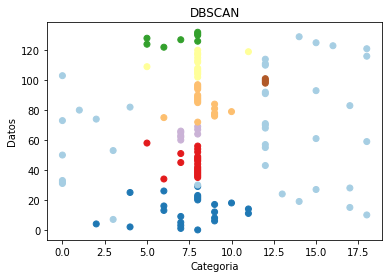

In [ ]:
# visualzing clusters
plt.scatter(X[:,0], X[:,1],c=predicted_labels, cmap='Paired')
plt.xlabel('Categoria')
plt.ylabel('Datos')
plt.title("DBSCAN")